In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
import pymorphy2
from nltk.stem import *
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import WordNetLemmatizer
import os
from preproccesing import *
from sklearn.cluster import KMeans

In [148]:
data_files = []
flag = True

for root, dirs, files in os.walk("json/Используется/"):  
    for filename in files:
        data_files.append(filename)
        if flag:
            df = pd.read_json("json/Используется/" + filename); flag = False
        else:
            df.append(pd.read_json("json/Используется/" + filename))
data_files

['Jennifer Reinhardt.json']

# Запись сообщений в переменную

In [149]:
message_text = []

for i in range(df.shape[0]):
    message_text.append(df.iloc[i][1]['text'])
len(message_text)

96369

In [150]:
message_text = del_stopWords(message_text)
while True:
    try:
        del message_text[message_text.index('')]
    except:
        break

In [151]:
precessed_messages = lemmatize(message_text)

In [121]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def pca(data, target=None, title=''):
    plt.figure()
    data_r_2 = PCA(n_components=2, random_state=0)
    data_reduced_2 = data_r_2.fit_transform(data)
    plt.scatter(data_reduced_2[:, 0], data_reduced_2[:, 1], c=target,
                # cmap=mcolors.ListedColormap(["red", "gray"]),
                edgecolor="k",
                s=40)
    plt.title(title) 
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    data_r_3 = PCA(n_components=3, random_state=0)
    data_reduced_3 = data_r_3.fit_transform(data)
    ax.scatter(data_reduced_3[:, 0], data_reduced_3[:, 1], data_reduced_3[:, 2], c=target,
                # cmap=mcolors.ListedColormap(["red", "gray"]),
                edgecolor="k",
                s=40)
    plt.title(title) 
    # print("Выделенные компоненты", data_r_2.components_, "Главные компоненты(2)", data_r_2.explained_variance_ratio_, sep='\n')
    # print("Главные компоненты(3)", data_r_3.explained_variance_ratio_, sep='\n')

# Кластеризация/Классификация

In [42]:
vect = CountVectorizer(max_features=10000, stop_words=None)
tf_idf_vect = TfidfTransformer(use_idf=True)

count = vect.fit_transform(precessed_messages)
tf_idf = tf_idf_vect.fit(count.toarray())



In [8]:
TFIDF_vect = TfidfVectorizer(max_features=2000, stop_words=None)
tf_idf = TFIDF_vect.fit_transform(precessed_messages)

In [9]:
tf_idf = tf_idf.toarray()

In [ ]:
from sklearn.model_selection import train_test_split



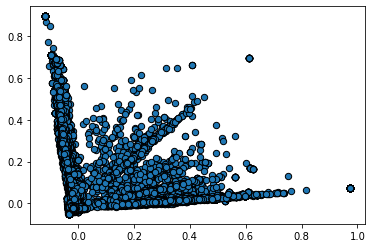

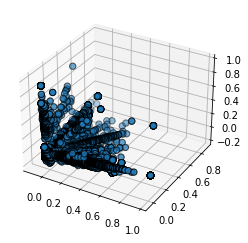

In [40]:
pca(tf_idf)

In [46]:
from sklearn.manifold import TSNE

def tsne(data, target=None):

    # Применение t-SNE для визуализации данных в двух измерениях
    tsne_ = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0)
    X_tsne = tsne_.fit_transform(data)

    # Визуализация результата
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target,
                # cmap=mcolors.ListedColormap(["red", "gray"]),
                edgecolor="k",
                s=40)
    # plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
    plt.show()

In [47]:
tsne(tf_idf)

c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Igorexy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
from sklearn.decomposition import TruncatedSVD

def truncatedSVD(data, target=None):
    # create TruncatedSVD object with 2 components
    svd = TruncatedSVD(data)
    # fit and transform the data using TruncatedSVD
    X_svd = svd.fit_transform(data)
    # print the reduced-dimensionality matrix
    print(X_svd)
    plt.scatter(X_svd[:, 0], X_svd[:, 1], c=target,
                    # cmap=mcolors.ListedColormap(["red", "gray"]),
                    edgecolor="k",
                    s=40)
        # plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
    plt.show()

In [ ]:
truncatedSVD(tf_idf)

In [41]:
kmeans_clast = KMeans(n_clusters=3, random_state=0)
kmeans_clast = kmeans_clast.fit(tf_idf)

In [42]:
pred = kmeans_clast.predict(tf_idf)

In [43]:
clusters = set(pred)

file = open("__output_.txt", 'w')

for c in clusters:
    for i in np.where(pred == c)[0]:
        file.write(str(c) + "|\t" + message_text[i] + '\n')
file.close()

In [44]:
# Посчитать число элементов в кластерах или классах
for c in clusters:
    print(c, list(pred).count(c))

0 253103
1 1514
2 10834


In [74]:
from gensim.models import Word2Vec

def word2vec(texts=None):
    """texts - список текстов для обучения"""

    # создаем корпус текстов
    corpus = [
        'This is the first sentence',
        'This is the second sentence',
        'And this is the third one',
        'Is this the first sentence?',
    ]

    # преобразуем тексты в список списков слов
    tokenized_corpus = [nltk.word_tokenize(sentence.lower()) for sentence in corpus]

    model = Word2Vec(tokenized_corpus, min_count=1)

    vector = model.wv['first']

    similar_words = model.wv.most_similar('first')

    return similar_words, vector

word2vec()

([('this', 0.17036527395248413),
  ('?', 0.1389048844575882),
  ('one', 0.03479008376598358),
  ('is', 0.004501505754888058),
  ('the', -0.027709651738405228),
  ('third', -0.028503933921456337),
  ('sentence', -0.04457903280854225),
  ('and', -0.06886731833219528),
  ('second', -0.17321977019309998)],
 array([-0.00714047,  0.00124257, -0.00717751, -0.00224353,  0.00372099,
         0.00583472,  0.00119907,  0.00210312, -0.00411319,  0.00722711,
        -0.00630755,  0.00464608, -0.00821798,  0.00203659, -0.00497526,
        -0.00424898, -0.00310905,  0.00565701,  0.00579608, -0.00497667,
         0.0007725 , -0.00849565,  0.0078109 ,  0.00925549, -0.00274034,
         0.00079947,  0.00074774,  0.00547808, -0.00860786,  0.00058408,
         0.00687114,  0.00222967,  0.00112461, -0.00932227,  0.00848112,
        -0.00626429, -0.0029925 ,  0.00349525, -0.00077177,  0.00140976,
         0.00178045, -0.00682843, -0.00972602,  0.00904186,  0.0061988 ,
        -0.00691277,  0.00340357,  0.00

In [60]:
similar_words = word2vec()
similar_words

[('yet', 0.21617333590984344),
 ('for', 0.0931011363863945),
 ('one', 0.09291724115610123),
 ('word2vec', 0.07963486015796661),
 ('second', 0.06285081058740616),
 ('another', 0.0270574688911438),
 ('more', 0.0161347147077322),
 ('the', -0.010839186608791351),
 ('final', -0.027750365436077118),
 ('first', -0.041253410279750824)]

In [37]:
import numpy as np

# Преобразование текстов в векторы
def text_to_vector(text, model):
    # Получение векторов всех слов в тексте
    vectors = [model.wv[word] for word in text if word in model.wv.vocab]
    # Усреднение векторов для получения одного вектора для всего текста
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
   


In [38]:
# text_to_vector(similar_words, model)

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [90]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk


def doc2vec(corpus=None):
    """corpus - список текстов для обработки
    Выходыне данные:
    similar_docs - число представляющее документ, список похожих документов, 
    doc_vector - вектор для каждого документа"""

    # создаем корпус документов
    """ corpus = [
        'This is the first document',
        'This is the second document',
        'And this is the third one',
        'Is this the first document?',
    ] """

    # преобразуем документы в формат TaggedDocument
    tagged_docs = [TaggedDocument(words=nltk.word_tokenize(doc.lower()), tags=[str(i)]) for i, doc in enumerate(corpus)]

    # создаем и обучаем модель Doc2Vec
    model = Doc2Vec(tagged_docs, vector_size=50, window=2, min_count=1, workers=4, epochs=100)

    # получаем вектор документа
    doc_vector = [model.infer_vector(nltk.word_tokenize(text.lower())) for text in corpus]

    # выводим похожие документы
    similar_docs = [model.docvecs.most_similar([dVec]) for dVec in doc_vector]

    """ sim_score_res = []

    for sim_doc in similar_docs:
        sim_score_res.append(dict())
        for doc_id, sim_score in sim_doc:
            sim_score_res[-1].update({doc_id: sim_score})
            print(f'Similar document ({sim_score:.2f}): {corpus[int(doc_id)], doc_id}')
        print() """

    return similar_docs, doc_vector

# doc_vec = doc2vec()[1]

In [152]:
message_vec = doc2vec(precessed_messages)[1]

C:\Users\Igorexy\AppData\Local\Temp\ipykernel_5864\1732203136.py:29: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_docs = [model.docvecs.most_similar([dVec]) for dVec in doc_vector]


In [154]:
kmeans = KMeans(n_clusters=20, random_state=0)
kmeans_fit = kmeans.fit(message_vec)
pred = kmeans_fit.predict(message_vec)

In [155]:
clusters = set(pred)

file = open("output/output_doc2vec_kmeans20_Jennifer.txt", 'w')

for c in clusters:
    for i in np.where(pred == c)[0]:
        file.write(str(c) + "|\t" + message_text[i] + '\n')
file.close()

In [156]:
# Посчитать число элементов в кластерах или классах
for c in clusters:
    print(c, list(pred).count(c))

0 3029
1 1886
2 884
3 2234
4 1406
5 1940
6 2581
7 19299
8 8351
9 6960
10 2017
11 1388
12 3023
13 10579
14 4252
15 2441
16 3813
17 1896
18 2426
19 2302
